In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import random

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

In [117]:
slide_input = 12

In [118]:
def gen(input):
    x = []
    y = []
    for i in range(input):
        x.append(i+1)
    slope = random.randint(1,4)
    for i in x:
        val = i*slope
        rand = random.randint(1,3)
        if rand == 1:
            y.append(val+1)
        elif rand == 2:
            y.append(val-1)
        else:
            y.append(val+2)
    print(x, len(x))
    print(y, len(y))
    data = pd.DataFrame({'X': x, 'Y': y})
    return data

In [119]:
data = gen(slide_input)
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 12
[0, 1, 2, 5, 4, 5, 6, 9, 10, 12, 12, 13] 12


,X,Y
0,1,0
1,2,1
2,3,2
3,4,5
4,5,4
5,6,5
6,7,6
7,8,9
8,9,10
9,10,12


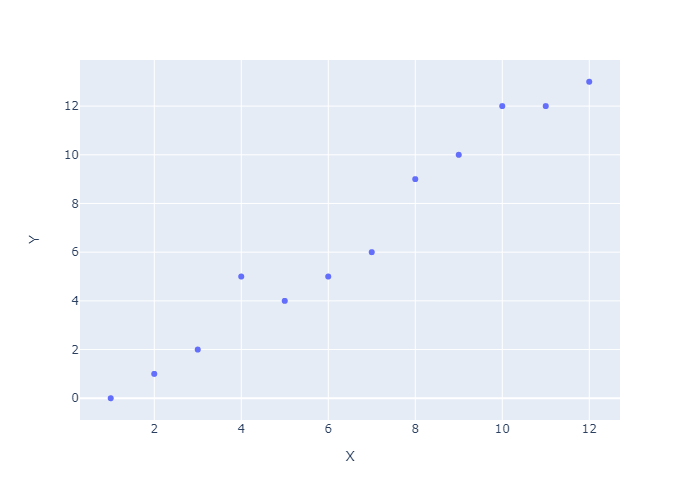

In [120]:
px.scatter(data, x='X', y='Y')

In [121]:
reg = LinearRegression().fit(np.array(data['X']).reshape(-1,1), np.array(data['Y']).reshape(-1,1))

In [122]:
preds = reg.predict(np.array(data['X']).reshape(-1,1))
new_data = pd.DataFrame({'X': x, 'Y': y, 'Model': preds.reshape(-1)})
new_data

,X,Y,Model
0,1,0,-0.205128
1,2,4,1.029138
2,3,4,2.263403
3,4,3,3.497669
4,5,7,4.731935
5,6,5,5.966200
6,7,9,7.200466
7,8,7,8.434732
8,9,10,9.668998
9,10,11,10.903263


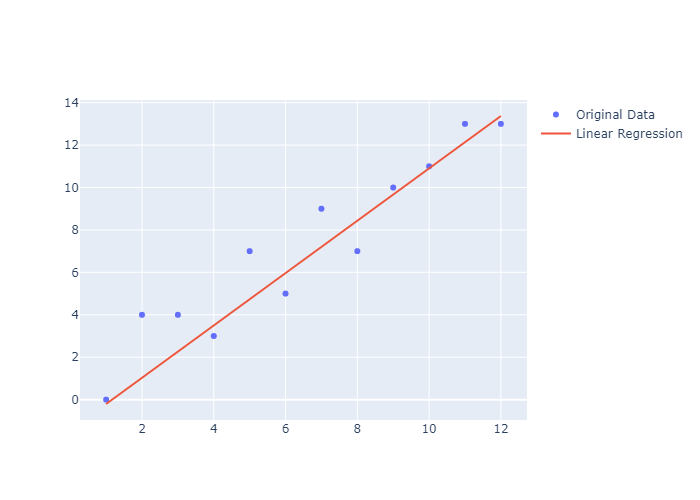

In [123]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_data['X'], y=new_data['Y'], mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=new_data['X'], y=new_data['Model'], mode='lines', name='Linear Regression'))

fig.show()

In [125]:
gen(2)

[1, 2] 2
[5, 9] 2


,X,Y
0,1,5
1,2,9
